In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import sys
import sklearn
import numpy as np
import os
import joblib
import pandas as pd


# to make this notebook's output stable across runs
np.random.seed(42)



PROJECT_ROOT_DIR = "/content/drive/MyDrive/4º Curso/Segundo cuatrimestre/TFG/Daniel Garvi Arvelo/Clasificación/Nuevos datos"



In [ ]:
#data = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, "datosRIMONE_DL.csv"))
train_data = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, "train_RIMONE_originales_extended.csv"))
test_data = pd.read_csv(os.path.join(PROJECT_ROOT_DIR, "test_RIMONE_generadas_extended.csv"))

In [ ]:
train_data.describe()

,aOD,sOD,aNR,N_ISNT,I_ISNT,T_ISNT,S_ISNT,aOC,sOC,aCDR,...,Curv_Global_Mean,Curv_TL_Max,Curv_TL_Mean,Curv_TR_Max,Curv_TR_Mean,Curv_BL_Max,Curv_BL_Mean,Curv_BR_Max,Curv_BR_Mean,Dist_Horizontal_Centroide
count,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,...,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000,339.000000
mean,20620.073746,0.922608,15207.982301,40.666667,41.834808,41.923304,42.233038,5412.091445,0.898068,0.258440,...,0.285555,1.790196,0.275137,1.796922,0.284510,1.802282,0.277788,1.765316,0.278930,17.598820
std,2774.037858,0.075558,3846.649315,17.782490,18.923292,17.303248,15.940217,3831.357891,0.164730,0.173476,...,0.029254,0.374076,0.063300,0.340707,0.064987,0.383543,0.070678,0.370589,0.066950,8.308305
min,13334.000000,0.666667,2433.000000,2.000000,1.000000,6.000000,7.000000,154.000000,0.521739,0.006607,...,0.140351,0.463648,0.049190,0.000000,0.000000,0.358771,0.100502,0.335968,0.091142,1.000000
25%,18726.000000,0.871595,12389.000000,27.000000,28.000000,28.000000,31.000000,2306.500000,0.789898,0.115667,...,0.269151,1.620741,0.236349,1.684588,0.245582,1.595625,0.234065,1.570796,0.233329,12.000000
50%,20639.000000,0.921348,15369.000000,38.000000,43.000000,39.000000,42.000000,4557.000000,0.896552,0.231001,...,0.285543,1.855527,0.276609,1.819506,0.288509,1.855527,0.284162,1.815775,0.283182,17.000000
75%,22497.500000,0.974270,18082.500000,55.000000,55.000000,54.000000,53.500000,7550.000000,1.000000,0.361996,...,0.304310,2.077895,0.322020,2.034444,0.327926,2.094716,0.327910,2.034444,0.320306,22.500000
max,30216.000000,1.228571,23299.000000,88.000000,87.000000,91.000000,90.000000,17951.000000,1.529412,0.867049,...,0.376553,2.235571,0.465385,2.235571,0.430656,2.235571,0.439096,2.231839,0.512038,45.000000


In [ ]:
test_data.describe()

,aOD,sOD,aNR,N_ISNT,I_ISNT,T_ISNT,S_ISNT,aOC,sOC,aCDR,...,Curv_Global_Mean,Curv_TL_Max,Curv_TL_Mean,Curv_TR_Max,Curv_TR_Mean,Curv_BL_Max,Curv_BL_Mean,Curv_BR_Max,Curv_BR_Mean,Dist_Horizontal_Centroide
count,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,...,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000,146.000000
mean,21429.143836,0.941018,15991.801370,36.431507,40.705479,48.794521,42.246575,5437.342466,0.892888,0.252741,...,0.286064,1.758373,0.275287,1.780369,0.281489,1.819022,0.278147,1.780013,0.275549,17.493151
std,1238.307772,0.022421,2654.457782,14.509881,15.476419,16.292549,13.509415,2674.176164,0.231745,0.120101,...,0.030680,0.403551,0.067569,0.338909,0.068732,0.368707,0.070205,0.355439,0.073199,8.404635
min,18369.000000,0.894118,9575.000000,13.000000,12.000000,23.000000,14.000000,580.000000,0.315789,0.027293,...,0.195576,0.124355,0.068522,0.643501,0.113813,0.358771,0.113670,0.588003,0.118985,0.000000
25%,20539.750000,0.925767,14403.250000,25.000000,28.000000,37.000000,32.250000,3348.250000,0.757355,0.156181,...,0.265380,1.589989,0.229634,1.649601,0.230476,1.665748,0.229902,1.651040,0.228849,11.000000
50%,21642.500000,0.936231,15821.000000,34.000000,43.000000,46.000000,42.000000,4945.500000,0.850971,0.248337,...,0.287188,1.817641,0.280528,1.819506,0.285331,1.901318,0.280634,1.819506,0.281726,18.000000
75%,22336.750000,0.953420,17931.250000,43.750000,51.750000,60.000000,52.000000,7066.500000,0.985741,0.328411,...,0.309372,2.044648,0.316577,2.016677,0.334896,2.111216,0.329740,2.042097,0.325223,23.000000
max,24475.000000,1.017751,21535.000000,86.000000,81.000000,95.000000,84.000000,13175.000000,1.760000,0.565111,...,0.360642,2.235571,0.457904,2.231839,0.422920,2.231839,0.418963,2.231839,0.480497,38.000000


In [ ]:
print(train_data["Etiqueta"].value_counts())
print(test_data["Etiqueta"].value_counts())

Etiqueta
normal      219
glaucoma    120
Name: count, dtype: int64
Etiqueta
normal      94
glaucoma    52
Name: count, dtype: int64


In [ ]:
X_train = train_data.drop(["Etiqueta","nombre_archivo"],axis=1)
y_train = train_data["Etiqueta"]
X_test = test_data.drop(["Etiqueta","nombre_archivo"],axis=1)
y_test = test_data["Etiqueta"]



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import precision_score, roc_auc_score, accuracy_score,recall_score, f1_score,balanced_accuracy_score

def plot_precision_vs_recall(precisions, recalls,label=None,color = 'b',fig_num=1):
    plt.figure(fig_num)
    plt.plot(recalls, precisions, linewidth=2,label=label,color=color)
    plt.xlabel("Recall", fontsize=16)
    plt.ylabel("Precision", fontsize=16)
    plt.axis([0, 1, 0, 1])
    plt.grid(True)

def plot_roc_curve(fpr, tpr, label=None,color='b',fig_num=1):
    plt.figure(fig_num)
    plt.plot(fpr, tpr, linewidth=2, label=label,color =color)
    #plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
    plt.axis([0, 1, 0, 1])                                    # Not shown in the book
    plt.xlabel('False Positive Rate (1-Specificity)', fontsize=16) # Not shown
    plt.ylabel('True Positive Rate (Sensitivity)', fontsize=16)    # Not shown
    plt.grid(True)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42, class_weight='balanced')
param_grid=[{"max_depth":[None,3,4,5,10],"min_samples_leaf":[1,2,3,4,5,8,10,15]}]
dt_GS = GridSearchCV(dt, param_grid, cv=5,
                           scoring='accuracy',
                           return_train_score=True)
#dt_GS.fit(tuberculosis_train, y_train)
dt_GS.fit(X_train, y_train)

print("Best parameters ",dt_GS.best_params_)
print("Score :",dt_GS.best_score_)


Best parameters  {'max_depth': None, 'min_samples_leaf': 15}
Score : 0.8878841088674276


In [ ]:
for name, score in zip(list(X_train),dt_GS.best_estimator_.feature_importances_):
  print( name, score)

aOD 0.0
sOD 0.0
aNR 0.02729356377983081
N_ISNT 0.0011488544314575378
I_ISNT 0.05259963115824136
T_ISNT 0.0
S_ISNT 0.0
aOC 0.0
sOC 0.0
aCDR 0.0
vCDR 0.8545598721848242
hCDR 0.0
Wmin_rim 0.0
wRDR 0.062123231973756465
Curv_Global_Max 0.0
Curv_Global_Mean 0.0
Curv_TL_Max 0.0
Curv_TL_Mean 0.0
Curv_TR_Max 0.0
Curv_TR_Mean 0.002274846471889565
Curv_BL_Max 0.0
Curv_BL_Mean 0.0
Curv_BR_Max 0.0
Curv_BR_Mean 0.0
Dist_Horizontal_Centroide 0.0


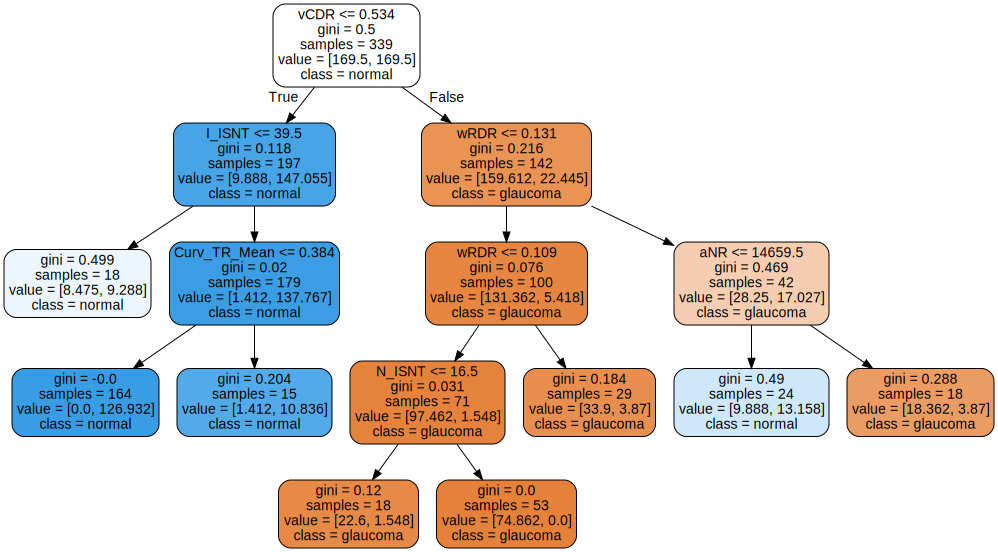

In [ ]:
from graphviz import Source
from sklearn.tree import export_graphviz

export_graphviz(
        dt_GS.best_estimator_,
        out_file="rimone.dot",
        feature_names=list(X_train),
        class_names = ['glaucoma','normal'],
        rounded=True,
        filled=True
    )

Source.from_file("rimone.dot")

Decision Tree        AUC: 0.94 | T=0.50 Acc 0.89 P 0.83 R 0.86 ESP 0.86 F1 0.84 YD 0.72|T=0.20 Acc 0.86 P 0.72 R 0.98 ESP 0.98 F1 0.83 YD 0.97|T=0.51 Acc 0.89 P 0.83 R 0.86 ESP 0.86 F1 0.84 YD 0.72|


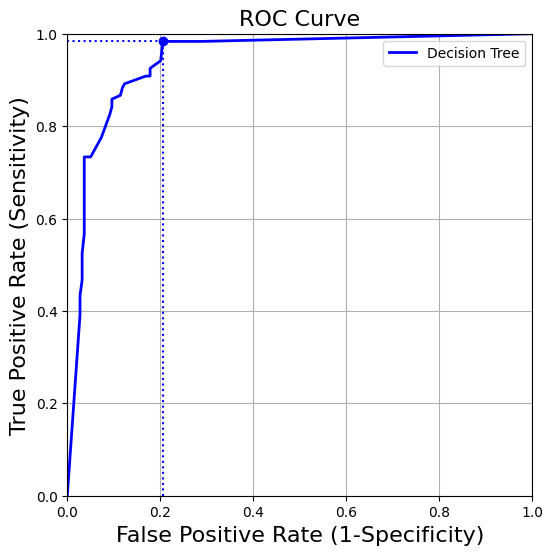

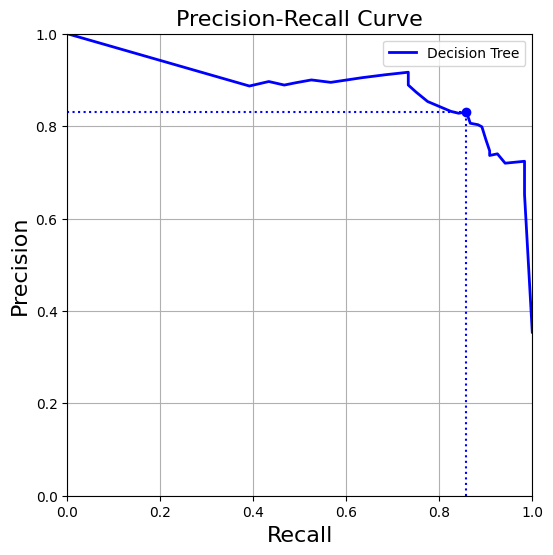

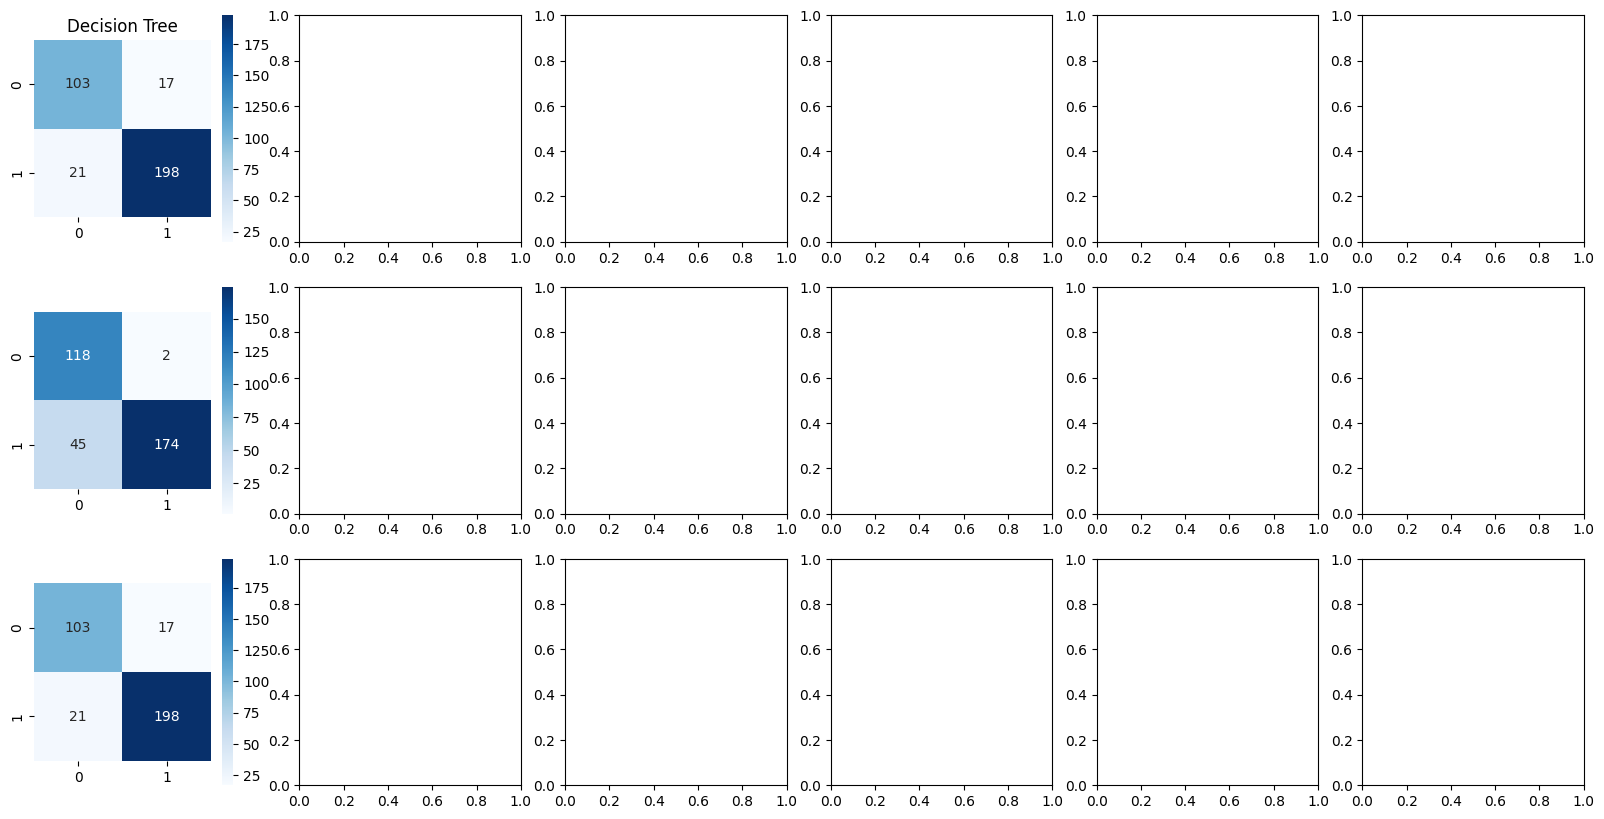

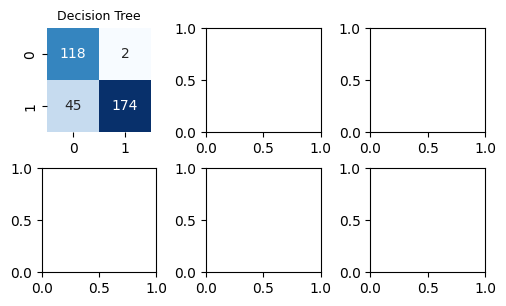

In [ ]:

estimators= {"Decision Tree":dt_GS.best_estimator_}
estimators_thresh = {"Decision Tree":[]}

#@title
from sklearn.base import clone
from itertools import cycle
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import math

def cutoff_youdens_j(fpr,tpr,thresholds):
    j_scores = tpr-fpr
    j_ordered = sorted(zip(j_scores,thresholds,tpr,fpr))
    return [j_ordered[-1][1],j_ordered[-1][2],j_ordered[-1][3] ]

def cutoff_f1_score(precisions, recalls, thresholds):
    np.seterr(divide='ignore', invalid='ignore')
    f1_scores = 2* precisions*recalls/(precisions+recalls)
    np.seterr(divide='warn', invalid='warn')
    f1_score_ordered = sorted(zip(f1_scores,thresholds,precisions,recalls))
    f1_score_ordered_fix = list(filter(lambda x: not(np.isnan(x[0])), f1_score_ordered))
    #for e in f1_score_ordered_fix:
     # print(e)
    return [f1_score_ordered_fix[-1][1], f1_score_ordered_fix[-1][2],f1_score_ordered_fix[-1][3]]


cycol_roc = cycle('bgrcmk')
cycol_pr = cycle('bgrcmk')

plt.figure(num=1,figsize=(6, 6))
plt.figure(num=2,figsize=(6, 6))
fig3, axs = plt.subplots(3, 6,figsize=(20, 10),num=3)
fig4, axs2 = plt.subplots(2, 3,figsize=(5, 3),num=4)

cm_pos = [1,1,1,1,1,1]
cont = 0
col=0
for name in estimators:
  clone_clf = clone(estimators[name])
  #clone_clf.fit(X_train,y_train);
  y_train_probs = cross_val_predict(clone_clf, X_train, y_train, cv=5,
                                       method="predict_proba")
  #y_train_pred = cross_val_predict(clone_clf, X_train, y_train, cv=5)

  fpr, tpr, thresholds = roc_curve(y_train, y_train_probs[:,0],pos_label='glaucoma')

  precisions, recalls, pr_thresholds = precision_recall_curve(y_train, y_train_probs[:,0],pos_label= 'glaucoma')

  [thresh_j,tpr_j,fpr_j] = cutoff_youdens_j(fpr,tpr,thresholds)

  [thresh_f1,p_j,r_j] = cutoff_f1_score(precisions, recalls, pr_thresholds)


  #ROC-curve
  color=next(cycol_roc)
  plot_roc_curve(fpr, tpr,label=name,color=color,fig_num=1)
  plt.plot([fpr_j,fpr_j],[0.0,tpr_j],color=color, linestyle=':')
  plt.plot([0.0,fpr_j],[tpr_j,tpr_j],color=color, linestyle=':')
  plt.plot([fpr_j],[tpr_j],color=color, marker='o')
  plt.legend()
  plt.title('ROC Curve', fontsize=16)

  #P-R curve
  color=next(cycol_pr)
  plot_precision_vs_recall(precisions, recalls,label=name,color=color,fig_num=2)
  plt.plot([r_j,r_j],[0.0,p_j],color=color, linestyle=':')
  plt.plot([0.0,r_j],[p_j,p_j],color=color, linestyle=':')
  plt.plot([r_j],[p_j],color=color, marker='o')
  plt.legend()
  plt.title('Precision-Recall Curve', fontsize=16)

  thresholds = [0.5,thresh_j,thresh_f1]
  estimators_thresh[name] = thresholds;
  print ("{0:20} AUC: {1:.2f} |".format(name,roc_auc_score(y_train, y_train_probs[:,1])),end=" ");
  row = 0

  for t in thresholds:
    y_train_pred = ['glaucoma' if m >= t else 'normal' for m in y_train_probs[:,0]]
    cm = confusion_matrix(y_train,y_train_pred)
    acc = accuracy_score(y_train, y_train_pred)
    p = precision_score(y_train, y_train_pred,pos_label= 'glaucoma')
    r = recall_score(y_train, y_train_pred, pos_label = 'glaucoma')
    f1 = f1_score(y_train, y_train_pred, pos_label = 'glaucoma')
    esp = cm[0,0]/(cm[0,0]+cm[0,1])
    youden = esp + r - 1
    print ("T={0:.2f} Acc {1:.2f} P {2:.2f} R {3:.2f} ESP {4:.2f} F1 {5:.2f} YD {6:.2f}|".format(t,acc,p,r,esp,f1,youden),end="")
    sns_fig = sns.heatmap(cm, ax =axs[row, col],annot=True,cmap=plt.cm.Blues,fmt='d',square=True)
    if (row == cm_pos[cont]):
      sns_fig2 = sns.heatmap(cm, ax =axs2[math.floor(cont/3), cont%3],annot=True,cmap=plt.cm.Blues,fmt='d',square=True, cbar=False)
      axs2[math.floor(cont/3), cont%3].set_title(name,fontsize=9)

    if row == 0:
      axs[row, col].set_title(name)
    row = row + 1
  print ("")
  col = col + 1
  cont +=1
plt.figure(1)
#save_fig("ROC_"+gs_scoring[s_i])
plt.figure(2)
#save_fig("PR_"+gs_scoring[s_i])
plt.figure(3)
#save_fig("CM_"+gs_scoring[s_i]+"_val", tight_layout=False)
plt.figure(4)
plt.tight_layout(pad = 0.5)
#save_fig("CM_"+gs_scoring[s_i]+"_val_compact", tight_layout=True, pad = 0.5)

## En testeo

Decision Tree        AUC: 0.81 | T=0.50 Acc 0.76 P 0.65 R 0.71 ESP 0.71 F1 0.68 YD 0.42 |T=0.20 Acc 0.76 P 0.62 R 0.85 ESP 0.85 F1 0.72 YD 0.69 |T=0.51 Acc 0.76 P 0.65 R 0.71 ESP 0.71 F1 0.68 YD 0.42 |


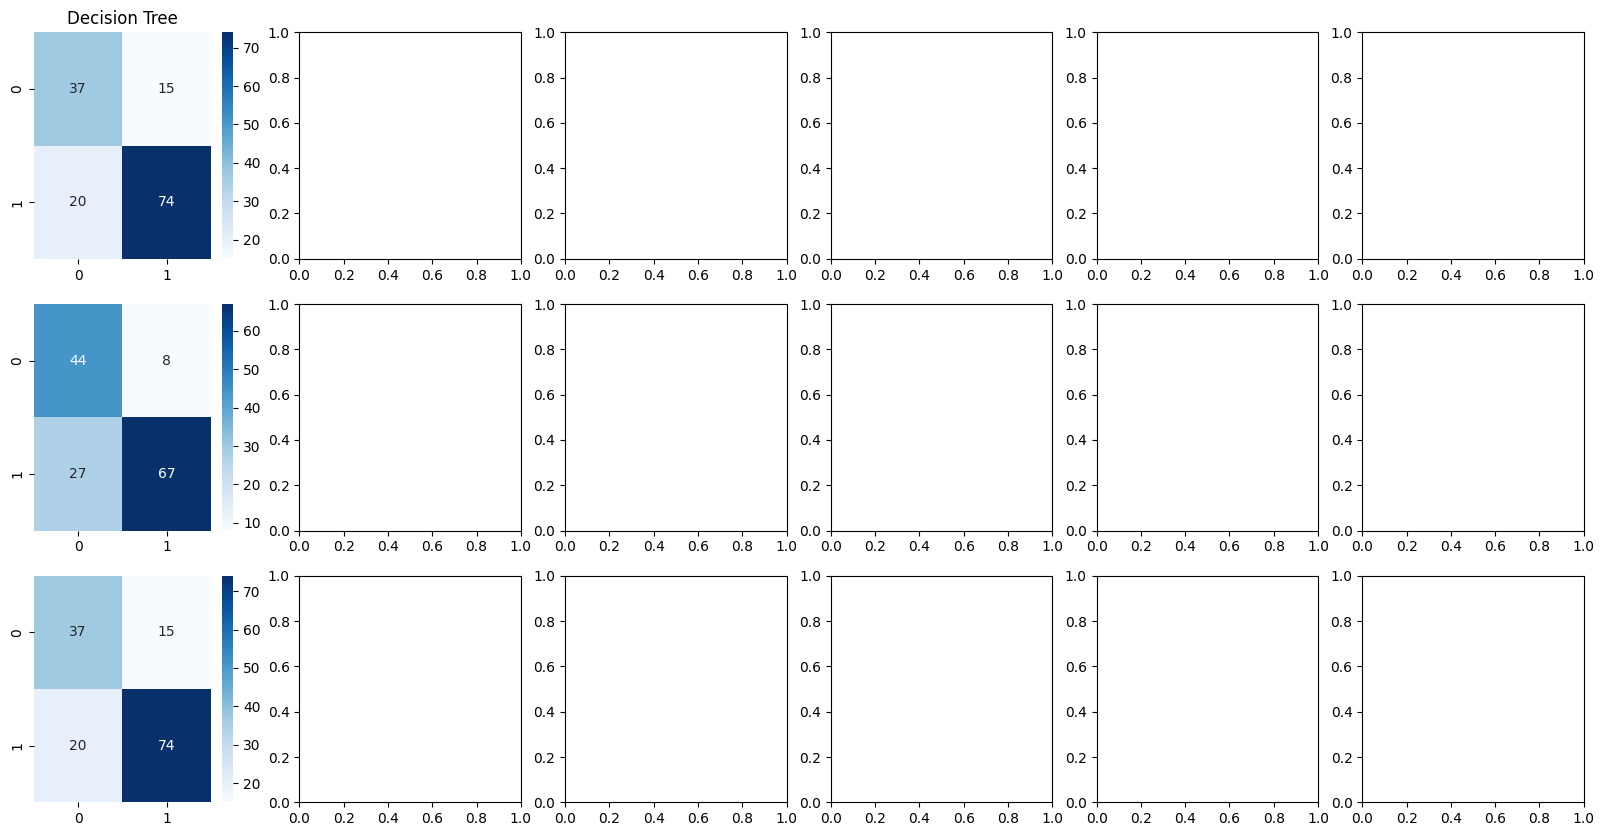

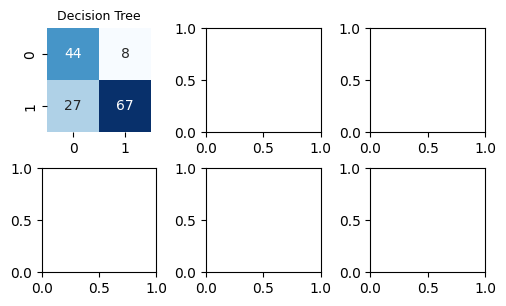

In [ ]:
fig1, axs = plt.subplots(3, 6,figsize=(20, 10),num=1)
fig2, axs2 = plt.subplots(2, 3,figsize=(5, 3),num=2)
#plt.suptitle('Confusion Matrices', fontsize=16)
#fig3.xlabel('True Label', fontsize=16)
#fig3.ylabel('Predicted Label', fontsize=16)
cont = 0
#print(X_test)
col=0
#print(estimators_thresh)
for name in estimators:
  clf = estimators[name]

  #conf. matrix
  y_test_probs = clf.predict_proba(X_test)
  #print("Distribución de probabilidades únicas:")
  #for prob, count in zip(unique_probs, counts):
    #print(f"Probabilidad: {prob:.2f}, Conteo: {count}")

  print ("{0:20} AUC: {1:.2f} |".format(name,roc_auc_score(y_test, y_test_probs[:,1])),end=" ");
  row = 0
  thresholds=estimators_thresh[name]
  for t in thresholds:
    y_test_pred = ['glaucoma' if m >= t else 'normal' for m in y_test_probs[:,0]]
    cm = confusion_matrix(y_test,y_test_pred)
    acc = accuracy_score(y_test, y_test_pred)
    p = precision_score(y_test, y_test_pred,pos_label='glaucoma')
    r = recall_score(y_test, y_test_pred,pos_label='glaucoma')
    f1 = f1_score(y_test, y_test_pred,pos_label='glaucoma')
    esp = cm[0,0]/(cm[0,0]+cm[0,1])
    youden = r + esp - 1
    print ("T={0:.2f} Acc {1:.2f} P {2:.2f} R {3:.2f} ESP {4:.2f} F1 {5:.2f} YD {6:.2f} |".format(t,acc,p,r,esp,f1, youden),end="")
    sns_fig = sns.heatmap(cm, ax =axs[row, col],annot=True,cmap=plt.cm.Blues,fmt='d')
    if (row == cm_pos[cont]):
      sns_fig2 = sns.heatmap(cm, ax =axs2[math.floor(cont/3), cont%3],annot=True,cmap=plt.cm.Blues,fmt='d',square=True, cbar=False)
      axs2[math.floor(cont/3), cont%3].set_title(name,fontsize=9)

    if row == 0:
      axs[row, col].set_title(name)
    row = row + 1
  print ("")
  col = col + 1
  cont +=1
plt.figure(1)
#save_fig("CM_"+gs_scoring[s_i]+"_test", tight_layout=False)
plt.figure(2)
plt.tight_layout(pad = 0.5)
#save_fig("CM_"+gs_scoring[s_i]+"_test_compact", tight_layout=True, pad = 0.5)